<font size="3"> 

<b>Name: Bai Lan
<br>
<br>
August 2021
<br>
<br>
Title: Predictive Modelling with Time Series<b> 

</font>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/bailan/data_1995_new_interest.csv')

In [3]:
data.head()

,Date,Interest
0,1995-01,7.78
1,1995-02,7.47
2,1995-03,7.20
3,1995-04,7.06
4,1995-05,6.63


In [4]:
data.tail(7)

,Date,Interest
101,2003-06,3.33
102,2003-07,3.98
103,2003-08,4.45
104,2003-09,4.27
105,2003-10,4.29
106,2003-11,4.30
107,2003-12,4.27


In [5]:
data.dtypes
data['Date']=pd.to_datetime(data['Date'])
data.dtypes

Date        datetime64[ns]
Interest           float64
dtype: object

In [6]:
data.set_index('Date',inplace=True)

In [7]:
data.head()

,Interest
Date,
1995-01-01,7.78
1995-02-01,7.47
1995-03-01,7.20
1995-04-01,7.06
1995-05-01,6.63


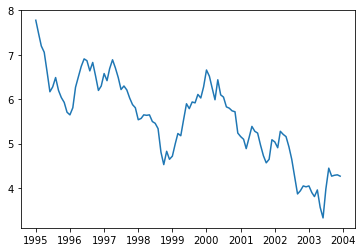

In [8]:
plt.plot(data.Interest)
plt.show()

In [ ]:

# ADF Test p< 0.05 for stationary series
from statsmodels.tsa.stattools import adfuller

result = adfuller(data, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

In [9]:
#Spliting the dataset into train and test
train = data[:102]
test = data[-6:]

In [10]:
train.tail()

,Interest
Date,
2003-02-01,3.90
2003-03-01,3.81
2003-04-01,3.96
2003-05-01,3.57
2003-06-01,3.33


In [11]:
test.head()

,Interest
Date,
2003-07-01,3.98
2003-08-01,4.45
2003-09-01,4.27
2003-10-01,4.29
2003-11-01,4.30


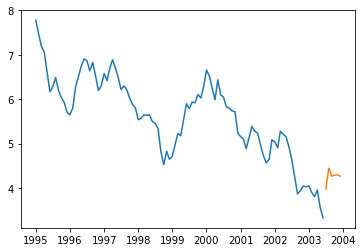

In [12]:
plt.plot(train)
plt.plot(test)

In [13]:
from pmdarima.arima import auto_arima
my_model =  auto_arima(train,start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5,
                          seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8.676, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11.048, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11.650, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6.949, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10.048, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9.936, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8.049, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-11.032, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.475 seconds


In [14]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(0, 1, 1)   Log Likelihood                   8.825
Date:                Sun, 22 Aug 2021   AIC                            -11.650
Time:                        15:07:05   BIC                             -3.804
Sample:                             0   HQIC                            -8.474
                                - 102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0448      0.028     -1.592      0.111      -0.100       0.010
ma.L1          0.2397      0.098      2.445      0.014       0.048       0.432
sigma2         0.0491      0.008      5.887      0.000       0.033       0.065
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.88   Prob(JB):                         0.33
Heteroskedasticity (H):               0.89   Skew:                             0.23
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

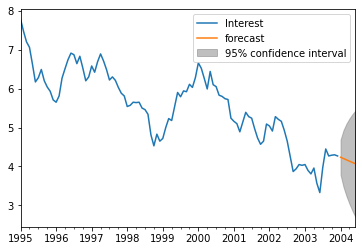

In [24]:
import statsmodels.api as sm

dta = data[['Interest']]
dta.index = pd.date_range(start='1995-01', end='2004-01', freq='M')

res = sm.tsa.ARIMA(dta, (0,1,1)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1995-01':].plot(ax=ax)
fig = res.plot_predict('2004-01', '2004-06', dynamic=True, ax=ax,plot_insample=False)
plt.show()

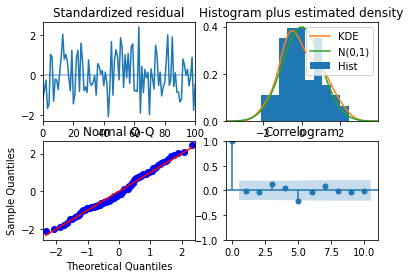

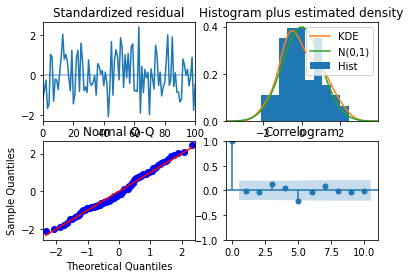

In [15]:
my_model.plot_diagnostics()